## Start code:

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('./data/movie_lens_genre_separated.tsv', sep='\t')

In [132]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,age_group
0,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Animation,Adult
1,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Children's,Adult
2,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Comedy,Adult
3,2924,2355,4,971592069,F,18-24,college/grad student,94121,"Bug's Life, A (1998)",Animation,Adult
4,2924,2355,4,971592069,F,18-24,college/grad student,94121,"Bug's Life, A (1998)",Children's,Adult


In [4]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')

In [5]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [6]:
ratings_by_title = data.groupby('title').size()

In [7]:
ratings_by_title[:5]

title
$1,000,000 Duck (1971)            74
'Night Mother (1986)              70
'Til There Was You (1997)        104
'burbs, The (1989)               303
...And Justice for All (1979)    398
dtype: int64

In [8]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [9]:
active_titles[:5]

Index([''burbs, The (1989)', '...And Justice for All (1979)',
       '10 Things I Hate About You (1999)', '101 Dalmatians (1961)',
       '101 Dalmatians (1996)'],
      dtype='object', name='title')

In [10]:
mean_ratings = mean_ratings.loc[active_titles]

In [11]:
mean_ratings[:5]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215


In [12]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [13]:
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Grand Illusion (Grande illusion, La) (1937)",4.560976,4.266129
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611


In [14]:
top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)

In [15]:
top_male_ratings[:10]

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
Paths of Glory (1957),4.392857,4.485149
"Wrong Trousers, The (1993)",4.588235,4.478261


In [16]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [17]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [18]:
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Cutthroat Island (1995),3.200000,2.341270,-0.858730
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Home Alone 3 (1997),2.486486,1.683761,-0.802726
That Darn Cat! (1997),3.156250,2.435484,-0.720766
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Dracula: Dead and Loving It (1995),2.892857,2.250000,-0.642857
"Pagemaster, The (1994)",3.146341,2.510638,-0.635703
Grease (1978),3.975265,3.367041,-0.608224
Herbie Goes Bananas (1980),2.965517,2.373333,-0.592184


In [19]:
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
Lifeforce (1985),2.250000,2.994152,0.744152
Marked for Death (1990),2.100000,2.837607,0.737607
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
No Escape (1994),2.300000,2.994048,0.694048
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985


In [20]:
occupation_dict = { 
    0: "not specified", 
    1: "academic/educator",
    2:  "artist",
    3:  "clerical/admin",
    4:  "college/grad student",
    5:  "customer service",
    6:  "doctor/health care",
    7:  "executive/managerial",
    8:  "farmer",
    9:  "homemaker",
    10:  "K-12 student",
    11:  "lawyer",
    12:  "programmer",
    13:  "retired",
    14:  "sales/marketing",
    15:  "scientist",
    16:  "self-employed",
    17:  "technician/engineer",
    18:  "tradesman/craftsman",
    19:  "unemployed",
    20:  "writer"
}

age_dict = {
    1:  "Under 18",
    18:  "18-24",
    25:  "25-34",
    35:  "35-44",
    45:  "45-49",
    50:  "50-55",
    56:  "56+"
}

In [21]:
data['age'] = [age_dict[x] for x in data['age']]
data['occupation'] = [occupation_dict[x] for x in data['occupation']]

In [128]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,age_group
0,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Animation,Adult
1,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Children's,Adult
2,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Comedy,Adult
3,2924,2355,4,971592069,F,18-24,college/grad student,94121,"Bug's Life, A (1998)",Animation,Adult
4,2924,2355,4,971592069,F,18-24,college/grad student,94121,"Bug's Life, A (1998)",Children's,Adult


## My work:

In [23]:
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_columns', 50)
%matplotlib inline

### 1. An aggregate (e.g., average) of the movie ratings for each particular genre.  
I'm not sure which way is better, so I used two ways from the materials that I learned from.  


In [24]:
movie_ave1 = data.groupby('genres').agg({'rating': [np.mean]})
movie_ave1

,rating
,mean
genres,
Action,3.491185
Adventure,3.477257
Animation,3.684895
Children's,3.422087
Comedy,3.522107
Crime,3.708679
Documentary,3.933123
Drama,3.766332


In [25]:
movie_groupby_genre = data.groupby('genres')
movie_ave2 = movie_groupby_genre.rating.mean()
movie_ave2

genres
Action         3.491185
Adventure      3.477257
Animation      3.684895
Children's     3.422087
Comedy         3.522107
Crime          3.708679
Documentary    3.933123
Drama          3.766332
Fantasy        3.447371
Film-Noir      4.075188
Horror         3.215013
Musical        3.665519
Mystery        3.668102
Romance        3.607465
Sci-Fi         3.466521
Thriller       3.570466
War            3.893327
Western        3.637770
Name: rating, dtype: float64

 ### 2. The top 5 highest ranked genre by occupation  
 
I use mean to decide the rating of a genre by a particular occupation. Here are the steps:
____
1. Create a pivot table, each occupation as the row, each genre as the column, mean rating as the value
____

In [121]:
pivoted_occup = data.pivot_table(index=['occupation'],
                           columns=['genres'],
                           values='rating',
                           aggfunc='mean',
                           fill_value=0)
pivoted_occup

genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
occupation,,,,,,,,,,,,,,,,,,
K-12 student,3.497116,3.425658,3.463956,3.220679,3.497200,3.687085,3.581633,3.782167,3.298039,4.212766,3.237795,3.556738,3.636612,3.624415,3.443795,3.554131,3.880144,3.513333
academic/educator,3.392063,3.424278,3.693399,3.459286,3.519583,3.659342,3.984887,3.754293,3.456388,4.082613,3.104548,3.701586,3.685255,3.605972,3.396863,3.526184,3.882950,3.629738
artist,3.457569,3.443535,3.624133,3.377481,3.504449,3.678039,4.028933,3.732216,3.424432,4.114000,3.243743,3.613322,3.719645,3.588446,3.500281,3.564667,3.859375,3.610483
clerical/admin,3.549025,3.556486,3.822104,3.609614,3.601516,3.742811,3.852632,3.790601,3.472675,4.075332,3.304525,3.857049,3.750000,3.704607,3.555942,3.645559,3.927692,3.626707
college/grad student,3.453687,3.419877,3.655775,3.346854,3.486595,3.723450,3.962887,3.748794,3.363636,4.039548,3.166907,3.642227,3.575105,3.558452,3.419123,3.514386,3.864107,3.519847
customer service,3.494995,3.478934,3.766940,3.513463,3.474962,3.696655,3.886598,3.739991,3.431478,4.027356,3.276987,3.641892,3.616992,3.563609,3.454210,3.542001,3.756677,3.613553
doctor/health care,3.564004,3.553981,3.681150,3.485747,3.585793,3.802857,4.013245,3.871756,3.486842,4.011348,3.256988,3.650061,3.784888,3.711271,3.471823,3.650789,4.005054,3.735007
executive/managerial,3.568687,3.509195,3.698059,3.442969,3.517354,3.736324,3.915134,3.766663,3.471070,4.030027,3.223292,3.665550,3.678220,3.615156,3.501961,3.625448,3.911164,3.635993
farmer,3.449309,3.397727,3.529851,3.229885,3.481363,3.575758,3.900000,3.627545,3.407895,3.878049,3.010989,3.560000,3.487805,3.573727,3.405455,3.454728,3.780488,3.705882


___
2. Access each row using .loc(), sort the value, and output the top 5
___

In [141]:
occupation_list = ["not specified", "college/grad student", "lawyer", "writer", "programmer", "technician/engineer",
                    "K-12 student", "self-employed", "executive/managerial", "academic/educator", "clerical/admin", 
                    "farmer", "artist", "homemaker", "unemployed", "tradesman/craftsman", "scientist", "retired", 
                    "customer service", "sales/marketing", "doctor/health care"]

for i in range(len(occupation_list)):
    print("Occupation: ", occupation_list[i])
    print(pivoted_occup.loc[occupation_list[i]].sort_values(ascending=False)[:5])
    print()


Occupation:  not specified
genres
Film-Noir      4.058155
Documentary    3.854545
War            3.852334
Drama          3.743350
Animation      3.674843
Name: not specified, dtype: float64

Occupation:  college/grad student
genres
Film-Noir      4.039548
Documentary    3.962887
War            3.864107
Drama          3.748794
Crime          3.723450
Name: college/grad student, dtype: float64

Occupation:  lawyer
genres
Film-Noir      4.145251
Documentary    4.141361
War            3.947634
Drama          3.763534
Mystery        3.741304
Name: lawyer, dtype: float64

Occupation:  writer
genres
Film-Noir      4.104603
Documentary    3.967914
War            3.798393
Animation      3.699623
Musical        3.669849
Name: writer, dtype: float64

Occupation:  programmer
genres
Film-Noir      4.130357
War            3.941926
Documentary    3.844221
Drama          3.840207
Western        3.773408
Name: programmer, dtype: float64

Occupation:  technician/engineer
genres
Film-Noir      4.050861
D

### 3. The most popular (with most ratings) movie by age group.

In [135]:
by_age = data.groupby(['age', 'title'])
pivoted_age = by_age.title.size().unstack(1).fillna(0)
pivoted_age

title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),"13th Warrior, The (1999)",187 (1997),2 Days in the Valley (1996),20 Dates (1998),"20,000 Leagues Under the Sea (1954)",200 Cigarettes (1999),2001: A Space Odyssey (1968),2010 (1984),24 7: Twenty Four Seven (1997),24-hour Woman (1998),28 Days (2000),3 Ninjas: High Noon On Mega Mountain (1998),3 Strikes (2000),"301, 302 (1995)","39 Steps, The (1935)",...,Xiu Xiu: The Sent-Down Girl (Tian yu) (1998),Yankee Zulu (1994),"Yards, The (1999)","Year My Voice Broke, The (1987)",Year of Living Dangerously (1982),Year of the Horse (1997),Yellow Submarine (1968),Yojimbo (1961),You Can't Take It With You (1938),You So Crazy (1994),You've Got Mail (1998),Young Doctors in Love (1982),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj�rlighetens kj�tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18-24,12.0,3.0,16.0,90.0,14.0,0.0,506.0,244.0,124.0,92.0,573.0,17.0,62.0,39.0,308.0,100.0,940.0,108.0,0.0,1.0,119.0,38.0,1.0,1.0,19.0,...,12.0,2.0,28.0,5.0,8.0,2.0,106.0,111.0,7.0,3.0,340.0,2.0,318.0,357.0,297.0,21.0,162.0,4.0,31.0,0.0,1.0,120.0,0.0,4.0,249.0
25-34,22.0,26.0,48.0,115.0,116.0,1.0,522.0,378.0,224.0,208.0,933.0,23.0,124.0,60.0,612.0,178.0,2428.0,400.0,2.0,4.0,200.0,22.0,2.0,4.0,70.0,...,46.0,0.0,60.0,12.0,214.0,0.0,300.0,216.0,22.0,7.0,614.0,38.0,882.0,834.0,540.0,31.0,495.0,2.0,54.0,0.0,16.0,288.0,0.0,6.0,549.0
35-44,30.0,21.0,20.0,55.0,140.0,0.0,136.0,230.0,186.0,120.0,336.0,3.0,52.0,18.0,580.0,40.0,1532.0,212.0,6.0,2.0,85.0,20.0,0.0,2.0,51.0,...,32.0,0.0,26.0,5.0,268.0,1.0,186.0,144.0,20.0,2.0,312.0,29.0,586.0,288.0,141.0,18.0,210.0,6.0,15.0,0.0,9.0,92.0,2.0,6.0,222.0
45-49,2.0,6.0,6.0,11.0,40.0,0.0,62.0,86.0,58.0,62.0,144.0,1.0,19.0,8.0,272.0,12.0,736.0,98.0,0.0,0.0,30.0,2.0,1.0,2.0,44.0,...,22.0,0.0,20.0,2.0,126.0,0.0,84.0,48.0,7.0,0.0,136.0,6.0,240.0,96.0,54.0,4.0,96.0,2.0,4.0,1.0,1.0,34.0,0.0,1.0,81.0
50-55,8.0,9.0,4.0,24.0,58.0,0.0,54.0,80.0,50.0,66.0,120.0,5.0,15.0,5.0,276.0,16.0,696.0,70.0,2.0,1.0,25.0,2.0,0.0,0.0,43.0,...,14.0,0.0,10.0,3.0,104.0,1.0,72.0,90.0,10.0,1.0,138.0,3.0,200.0,66.0,45.0,2.0,111.0,6.0,1.0,1.0,1.0,36.0,0.0,0.0,72.0
56+,0.0,3.0,6.0,6.0,28.0,1.0,10.0,42.0,18.0,51.0,60.0,4.0,11.0,5.0,208.0,6.0,372.0,36.0,0.0,1.0,24.0,2.0,0.0,0.0,22.0,...,10.0,2.0,2.0,0.0,50.0,0.0,32.0,24.0,9.0,0.0,70.0,1.0,102.0,36.0,21.0,2.0,54.0,0.0,1.0,0.0,0.0,16.0,0.0,0.0,15.0
Under 18,0.0,2.0,4.0,2.0,2.0,0.0,110.0,70.0,68.0,17.0,84.0,2.0,3.0,4.0,44.0,10.0,160.0,16.0,0.0,0.0,22.0,8.0,0.0,0.0,4.0,...,2.0,0.0,8.0,0.0,12.0,0.0,18.0,12.0,2.0,0.0,66.0,0.0,58.0,9.0,9.0,1.0,9.0,0.0,3.0,0.0,1.0,16.0,0.0,6.0,42.0


In [137]:
age_list = ["18-24", "25-34", "35-44", "45-49", "50-55", "56+", "Under 18"]

for i in range(len(age_list)):
    print("Age: ", age_list[i])
    print(pivoted_age.loc[age_list[i]].sort_values(ascending=False)[:1])
    print()

Age:  18-24
title
Star Wars: Episode VI - Return of the Jedi (1983)    2930.0
Name: 18-24, dtype: float64

Age:  25-34
title
Star Wars: Episode V - The Empire Strikes Back (1980)    5880.0
Name: 25-34, dtype: float64

Age:  35-44
title
Star Wars: Episode V - The Empire Strikes Back (1980)    2990.0
Name: 35-44, dtype: float64

Age:  45-49
title
Star Wars: Episode V - The Empire Strikes Back (1980)    1130.0
Name: 45-49, dtype: float64

Age:  50-55
title
Star Wars: Episode V - The Empire Strikes Back (1980)    1030.0
Name: 50-55, dtype: float64

Age:  56+
title
Star Wars: Episode V - The Empire Strikes Back (1980)    565.0
Name: 56+, dtype: float64

Age:  Under 18
title
Star Wars: Episode VI - Return of the Jedi (1983)    500.0
Name: Under 18, dtype: float64



### 4. A breakdown of a movie’s ratings by occupation, using any movie of your choice
I use mean as the aggregate of the ratings for a movie given by a particular occupation.

In [96]:
pivoted_movie = data.pivot_table(index=['title'],
                           columns=['occupation'],
                           values='rating',
                           aggfunc='mean',
                           fill_value=0)
pivoted_movie

occupation,K-12 student,academic/educator,artist,clerical/admin,college/grad student,customer service,doctor/health care,executive/managerial,farmer,homemaker,lawyer,not specified,programmer,retired,sales/marketing,scientist,self-employed,technician/engineer,tradesman/craftsman,unemployed,writer
title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",0.000000,2.166667,0.000000,4.000000,2.800000,4.000000,3.000000,3.000000,0.0,3.666667,0.000000,3.800000,1.000000,2.000000,0.000000,0.000000,5.000000,3.500000,0.00,3.500000,2.333333
'Night Mother (1986),1.000000,3.714286,3.000000,3.400000,3.666667,3.750000,3.500000,3.545455,0.0,0.000000,5.000000,2.615385,0.000000,4.666667,3.500000,3.500000,3.000000,2.500000,4.50,0.000000,3.000000
'Til There Was You (1997),3.500000,2.666667,2.500000,2.200000,3.333333,0.000000,2.000000,2.857143,0.0,0.000000,4.000000,2.666667,3.000000,4.000000,2.600000,0.000000,1.500000,4.000000,1.00,2.000000,2.333333
"'burbs, The (1989)",5.000000,2.958333,2.950000,2.833333,3.022222,2.916667,2.625000,2.615385,5.0,2.800000,2.000000,2.580645,2.933333,0.000000,3.250000,3.200000,2.833333,3.000000,3.10,3.400000,3.000000
...And Justice for All (1979),3.000000,3.650000,3.833333,2.875000,3.444444,3.750000,3.888889,3.848485,0.0,3.500000,3.833333,3.606061,3.500000,4.000000,3.538462,4.000000,4.000000,4.090909,3.75,4.000000,3.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Zed & Two Noughts, A (1985)",0.000000,5.000000,3.000000,3.000000,4.500000,0.000000,0.000000,2.500000,0.0,3.000000,0.000000,3.142857,4.000000,0.000000,0.000000,3.000000,3.500000,0.000000,0.00,0.000000,3.600000
Zero Effect (1998),4.571429,3.727273,3.555556,3.666667,3.605263,3.750000,3.375000,3.521739,4.0,0.000000,3.500000,3.804348,4.181818,3.600000,3.750000,3.818182,4.000000,3.571429,1.00,4.428571,3.666667
Zero Kelvin (Kj�rlighetens kj�tere) (1995),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.00,0.000000,3.000000


### 5. A function that given a user id, returns:   
#### (1) this user’s age and occupation  
#### (2) the average rating given by this user, and 
#### (3) his highest and lowest rated movie(s)

In [140]:
def user_info(data, user_id):
    df = data.set_index("user_id")
    age = df.loc[user_id]['age'][:1][user_id]
    occupation = df.loc[user_id]['occupation'][:1][user_id]
    ave_rating = df.loc[user_id]['rating'].mean()
    
    highest = df.loc[user_id]['rating'].sort_values(ascending=False)[:1][user_id]
    lowest = df.loc[user_id]['rating'].sort_values(ascending=True)[:1][user_id]
    
    low_movie_list = []
    high_movie_list = []
    movie_df = df.loc[[user_id],['rating', 'title']].sort_values('rating')
    
    for index, row in movie_df.iterrows(): 
        if row['rating'] == lowest:
            low_movie_list.append(row['title'])
        if row['rating'] == highest:
            high_movie_list.append(row['title'])
    
    res = {
        "age": age,
        "occupation": occupation,
        "average_rating": ave_rating,
        "highest_movie": high_movie_list,
        "lowest_movie": low_movie_list
    }
    
    return res

#Test case:
dic = user_info(data, 2933)
for key, value in dic.items():
    print(key, ':', value)
    print("===============")
        

age : 35-44
occupation : lawyer
average_rating : 3.8340425531914892
highest_movie : ['Spitfire Grill, The (1996)', 'Liberty Heights (1999)', "Schindler's List (1993)", "Schindler's List (1993)", 'Platoon (1986)', 'Rosewood (1997)', 'Platoon (1986)', 'Dances with Wolves (1990)', 'As Good As It Gets (1997)', 'Princess Bride, The (1987)', 'Fish Called Wanda, A (1988)', 'Shawshank Redemption, The (1994)', 'Dances with Wolves (1990)', 'Dances with Wolves (1990)', 'Princess Bride, The (1987)', 'Groundhog Day (1993)', 'Forrest Gump (1994)', 'Princess Bride, The (1987)', 'Forrest Gump (1994)', 'Full Metal Jacket (1987)', 'Full Metal Jacket (1987)', 'Raising Arizona (1987)', 'Full Metal Jacket (1987)', 'Brazil (1985)', 'As Good As It Gets (1997)', 'Forrest Gump (1994)', 'Princess Bride, The (1987)', 'Reservoir Dogs (1992)', 'Saving Private Ryan (1998)', 'American Beauty (1999)', 'Stand by Me (1986)', 'Stand by Me (1986)', 'Stand by Me (1986)', 'Green Mile, The (1999)', 'Face/Off (1997)', 'Face/

### 6. Some other statistic, figure, aggregate, or plot that you created using this dataset, along with a short description of what interesting observations you derived from it.

I would like to compare the rating difference between Adults and Teens, as well as Adults and Elders. Here are the steps: 
_______________________________
1. Define a function to help create a new column based on values from other columns
____

In [133]:
# Create age_group 
def label_age (row):
    if row['age'] == 'Under 18' :
        return 'Teen'
    if row['age'] == ('56+' or '50-55') :
        return 'Elder'
    else :
        return 'Adult'

data['age_group'] = data.apply (lambda row: label_age(row), axis=1)
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,age_group
0,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Animation,Adult
1,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Children's,Adult
2,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Comedy,Adult
3,2924,2355,4,971592069,F,18-24,college/grad student,94121,"Bug's Life, A (1998)",Animation,Adult
4,2924,2355,4,971592069,F,18-24,college/grad student,94121,"Bug's Life, A (1998)",Children's,Adult


_____
2. Create a pivot table with movie as row, age_group as column, average rating as value
____

In [71]:
pivoted = data.pivot_table(index=['movie_id', 'title'],
                           columns=['age_group'],
                           values='rating',
                           fill_value=0)
pivoted.head()

,age_group,Adult,Elder,Teen
movie_id,title,,,
1,Toy Story (1995),4.167364,3.886792,3.919643
2,Jumanji (1995),3.186260,3.500000,3.388889
3,Grumpier Old Men (1995),3.002326,2.933333,3.500000
4,Waiting to Exhale (1995),2.717791,2.750000,3.333333
5,Father of the Bride Part II (1995),2.978417,3.666667,3.400000


____
3. Calculate rating difference between adults and teens, as well as adults and elders
____

In [72]:
pivoted['diff_Adult_Teen'] = pivoted.Adult - pivoted.Teen
pivoted.head()

,age_group,Adult,Elder,Teen,diff_Adult_Teen
movie_id,title,,,,
1,Toy Story (1995),4.167364,3.886792,3.919643,0.247721
2,Jumanji (1995),3.186260,3.500000,3.388889,-0.202629
3,Grumpier Old Men (1995),3.002326,2.933333,3.500000,-0.497674
4,Waiting to Exhale (1995),2.717791,2.750000,3.333333,-0.615542
5,Father of the Bride Part II (1995),2.978417,3.666667,3.400000,-0.421583


In [73]:
pivoted['diff_Adult_Old'] = pivoted.Adult - pivoted.Elder
pivoted.head()

,age_group,Adult,Elder,Teen,diff_Adult_Teen,diff_Adult_Old
movie_id,title,,,,,
1,Toy Story (1995),4.167364,3.886792,3.919643,0.247721,0.280572
2,Jumanji (1995),3.186260,3.500000,3.388889,-0.202629,-0.313740
3,Grumpier Old Men (1995),3.002326,2.933333,3.500000,-0.497674,0.068992
4,Waiting to Exhale (1995),2.717791,2.750000,3.333333,-0.615542,-0.032209
5,Father of the Bride Part II (1995),2.978417,3.666667,3.400000,-0.421583,-0.688249


____
4. Get the most 50 rated movies as those movies are more convincing data
____

In [52]:
most_50 = data.groupby('movie_id').size().sort_values(ascending=False)[:50]

In [74]:
pivoted.reset_index('movie_id', inplace=True)

____
5. Plot the data
____

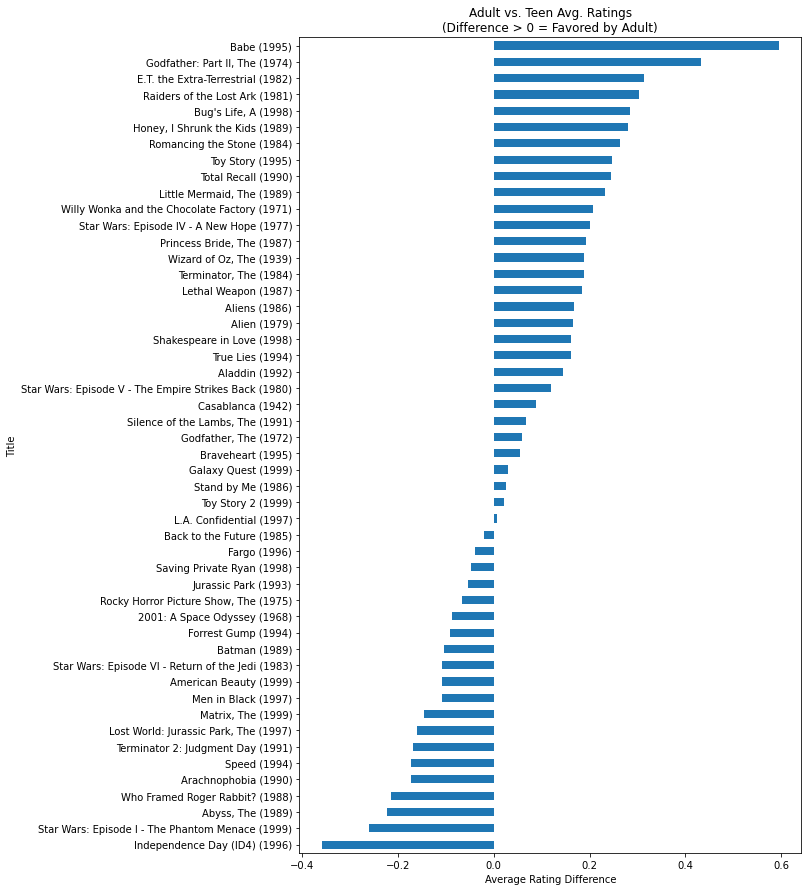

In [75]:
disagreements_adult_teen = pivoted[pivoted.movie_id.isin(most_50.index)]['diff_Adult_Teen']
disagreements_adult_teen.sort_values().plot(kind='barh', figsize=[9, 15])
plt.title('Adult vs. Teen Avg. Ratings\n(Difference > 0 = Favored by Adult)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');

#### What I found:
1. The movies that adults and teens most disagree on are 'Babe (1995)' and 'Independence Day (ID4) (1996)'.
2. It seems like that adults gave higher ratings for old movies (like movies in 1974, 1982), while teens gave higher ratings for new movies (like movies in 1999, 1996). It makes sense to me as teens are younger, they might not want to watch movies in the past because of the image quality, except for those famous movies though.

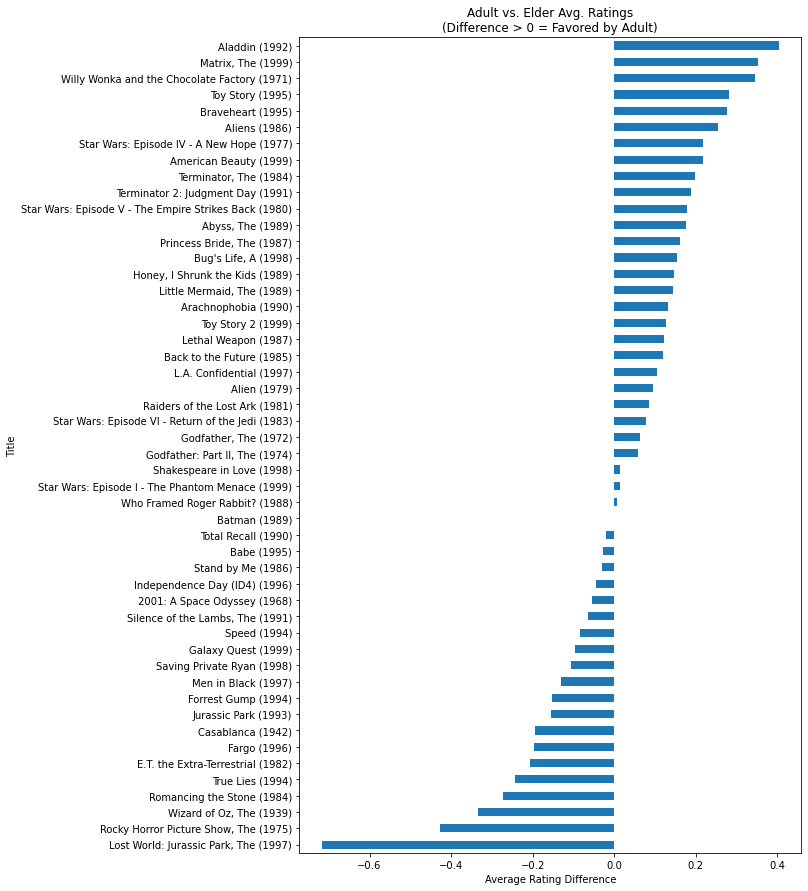

In [57]:
disagreements_adult_elder = pivoted[pivoted.movie_id.isin(most_50.index)]['diff_Adult_Old']
disagreements_adult_elder.sort_values().plot(kind='barh', figsize=[9, 15])
plt.title('Adult vs. Elder Avg. Ratings\n(Difference > 0 = Favored by Adult)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');

#### What I found:
1. The movies that adults and elders most disagree on are 'Aladdin (1992)' and 'Lost World: Jurassic Park(1997)'.
2. I also noticed that both of them like 'Batman (1989)', 'Godfather (1972)' and 'Star Wars (1999), there is no much disagreement on those movies. After all, they are all very famous and great movies!!! So I think quality of a movie plays the most important role in ratings. 